In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load cleaned datasets
employment_df = pd.read_csv('employment_cleaned.csv')
labour_df = pd.read_csv('labour_force_cleaned.csv')
twitter_df = pd.read_csv('twitter_cleaned.csv')


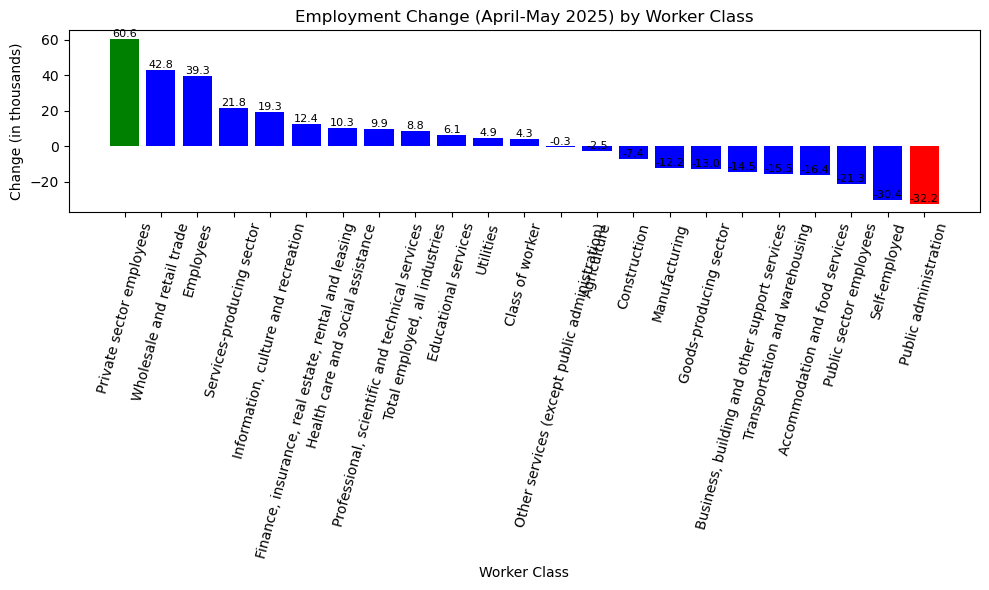

In [20]:
## Bar plot: Employment Change (April-May 2025)
# Sort the dataframe by change_apr_may_2025
sorted_df = employment_df.sort_values(by='change_apr_may_2025', ascending=False)

# Highlight top positive and negative changes
colors = ['green' if x == sorted_df['change_apr_may_2025'].max() 
          else 'red' if x == sorted_df['change_apr_may_2025'].min() 
          else 'blue' for x in sorted_df['change_apr_may_2025']]

plt.figure(figsize=(10,6))
bars = plt.bar(sorted_df['class_of_worker'], sorted_df['change_apr_may_2025'], color=colors)

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=8)

plt.title('Employment Change (April-May 2025) by Worker Class')
plt.xlabel('Worker Class')
plt.ylabel('Change (in thousands)')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

### Interpretation of Employment Change (April-May 2025) by Worker Class

The graph shows the month-to-month change in employment for different worker classes.

- **Positive Change (+):**  
  Indicates an **increase in employment**, meaning more people were hired or job opportunities increased in that category.  
  Example: *Private sector employees (+60.6)* experienced significant growth.

- **Negative Change (-):**  
  Indicates a **decrease in employment**, suggesting layoffs, job cuts, or fewer opportunities.  
  Example: *Public administration (-32.2)* saw a notable decline.

Overall, **Private sector employees** were the most positively impacted, while **Public administration** faced the largest job losses.


C:\Users\birva\AppData\Local\Temp\ipykernel_29228\4207344141.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class_of_worker', y='change_may2024_may2025', data=sorted_df, palette='coolwarm')


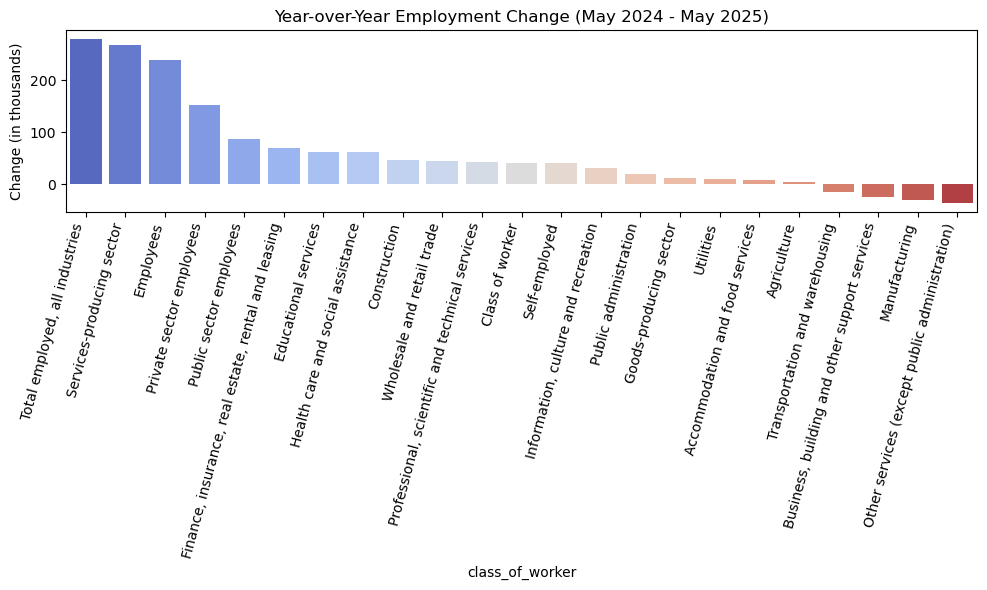

In [21]:
 ## Sort by absolute change for better visualization
sorted_df = employment_df.sort_values(by='change_may2024_may2025', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='class_of_worker', y='change_may2024_may2025', data=sorted_df, palette='coolwarm')
plt.title('Year-over-Year Employment Change (May 2024 - May 2025)')
plt.xticks(rotation=75, ha='right')
plt.ylabel('Change (in thousands)')
plt.tight_layout()
plt.show()


C:\Users\birva\AppData\Local\Temp\ipykernel_29228\3102269029.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class_of_worker', y='pct_change_may2024_may2025', data=sorted_pct_df, palette='viridis')


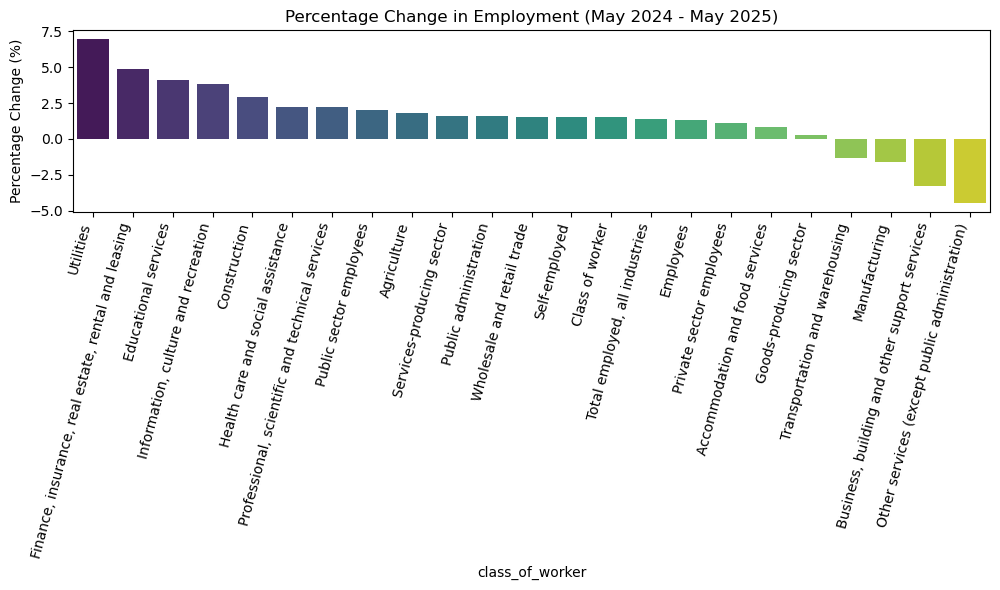

In [22]:
##. Percentage Year-over-Year Change
# ====================================
# Sort by percentage change
sorted_pct_df = employment_df.sort_values(by='pct_change_may2024_may2025', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='class_of_worker', y='pct_change_may2024_may2025', data=sorted_pct_df, palette='viridis')
plt.title('Percentage Change in Employment (May 2024 - May 2025)')
plt.xticks(rotation=75, ha='right')
plt.ylabel('Percentage Change (%)')
plt.tight_layout()
plt.show()

### Year-over-Year Employment Change (May 2024 - May 2025)

The bar chart highlights the absolute employment changes across different worker classes over a one-year period.

- **Positive bars (blue shades):** Indicate an increase in employment compared to May 2024.  
  For example, **Total employed, all industries** and **Service-producing sector** show strong growth.

- **Negative bars (red shades):** Indicate a decrease in employment, reflecting job losses or reduced workforce.  
  For example, **Public administration** experienced one of the largest declines.

- **Key Insight:** The chart suggests that most of the growth came from **service-oriented industries**, while **public sector and manufacturing-related sectors** saw reductions.

The color gradient (blue to red) helps visualize which sectors gained or lost the most employment during this period.


The year-over-year employment change from May 2024 to May 2025 reveals that Quebec experienced the highest growth, adding nearly 80,000 jobs, followed by Alberta and Ontario, which also showed significant employment gains. Provinces such as Nova Scotia, New Brunswick, and Saskatchewan demonstrated moderate increases, while Newfoundland and Labrador, along with Prince Edward Island, recorded the smallest improvements. Notably, no province experienced a decline in employment, indicating an overall positive employment trend across Canada.

C:\Users\birva\AppData\Local\Temp\ipykernel_29228\4132137259.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_col = str(row[0]).strip()  # First column (province or category)
C:\Users\birva\AppData\Local\Temp\ipykernel_29228\4132137259.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'YoY_Change': pd.to_numeric(row[5], errors='coerce')
C:\Users\birva\AppData\Local\Temp\ipykernel_29228\4132137259.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

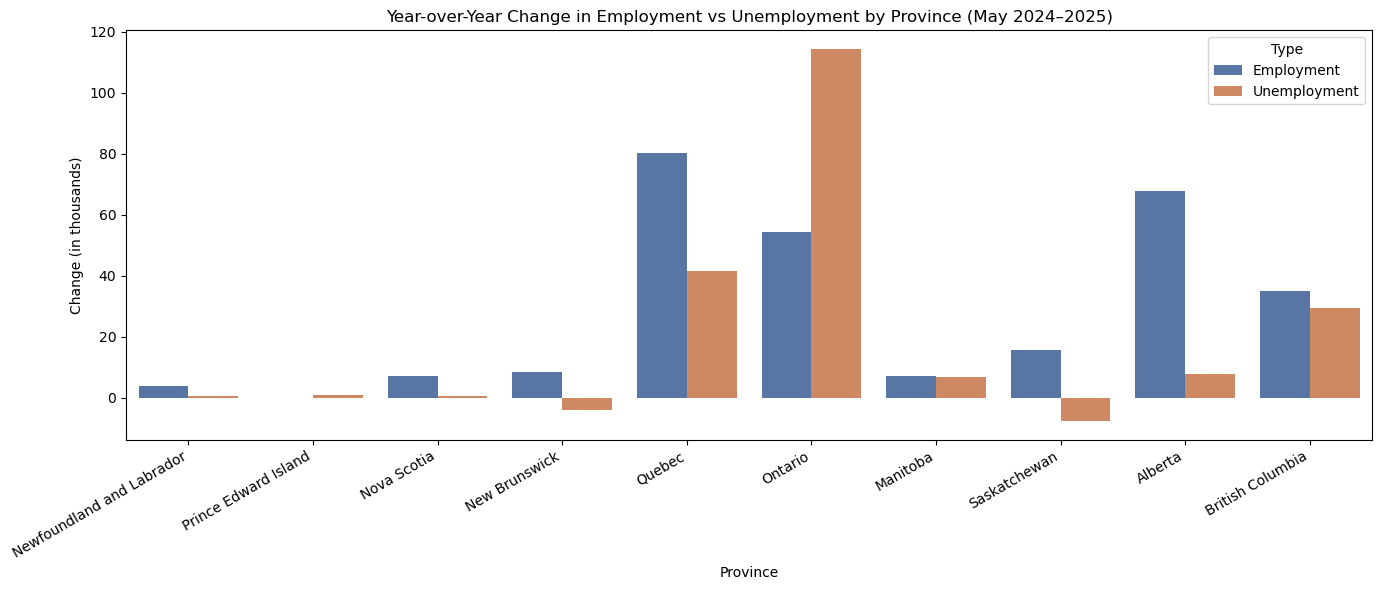

In [23]:
# - Define list of provinces ---
provinces = [
    "Newfoundland and Labrador", "Prince Edward Island", "Nova Scotia", "New Brunswick",
    "Quebec", "Ontario", "Manitoba", "Saskatchewan", "Alberta", "British Columbia"
]

# --- : Extract YoY changes ---
change_data = []
current_province = None

for i in range(len(labour_df)):
    row = labour_df.iloc[i]
    first_col = str(row[0]).strip()  # First column (province or category)
    
    if first_col in provinces:
        current_province = first_col
    elif first_col == "Employment" and current_province:
        change_data.append({
            'Province': current_province,
            'Type': 'Employment',
            'YoY_Change': pd.to_numeric(row[5], errors='coerce')
        })
    elif first_col == "Unemployment" and current_province:
        change_data.append({
            'Province': current_province,
            'Type': 'Unemployment',
            'YoY_Change': pd.to_numeric(row[5], errors='coerce')
        })

# --- Step 4: Create new DataFrame ---
change_df = pd.DataFrame(change_data)


# --- Step 5: Visualize ---
plt.figure(figsize=(14, 6))
sns.barplot(data=change_df, x='Province', y='YoY_Change', hue='Type', palette='deep')
plt.title("Year-over-Year Change in Employment vs Unemployment by Province (May 2024–2025)")
plt.xlabel("Province")
plt.ylabel("Change (in thousands)")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

### 📊 Year-over-Year Change in Employment vs Unemployment by Province (May 2024–2025)

This visual compares the year-over-year change in **employment** and **unemployment** across Canadian provinces between May 2024 and May 2025. 

- **Positive green bars** indicate an increase in employment, showing growth in the workforce.
- **Orange bars** represent the corresponding change in unemployment for each province.

#### 🔍 Key Insights:
- **Ontario** showed the largest increase in unemployment despite a notable rise in employment, suggesting population or workforce growth outpaced job creation.
- **Quebec** had a strong employment surge with moderate unemployment growth, indicating a healthier job absorption rate.
- **Alberta** and **British Columbia** recorded notable gains in employment with relatively lower rises in unemployment.
- Some Atlantic provinces like **New Brunswick** and **Newfoundland and Labrador** had minor changes, reflecting more stable labour markets.




In [24]:
pip install wordcloud


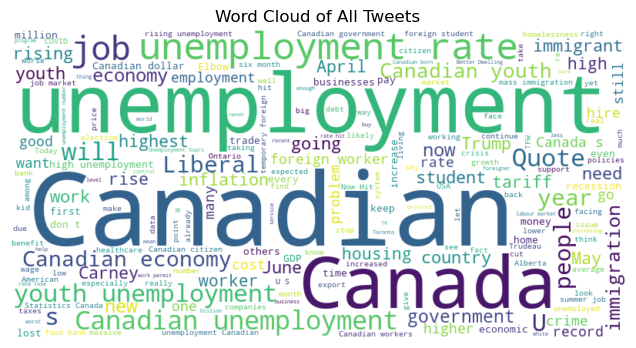

In [25]:
from wordcloud import WordCloud

all_text = " ".join(twitter_df['tweet_text'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Tweets")
plt.show()


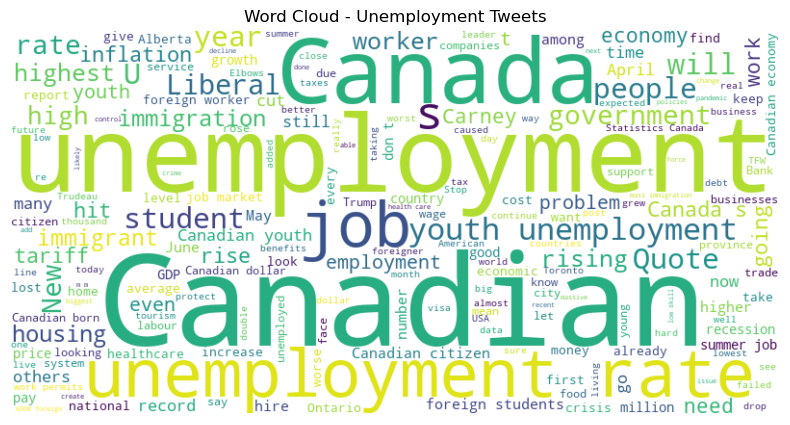

In [26]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('twitter_cleaned.csv')

# Filter tweets related to unemployment
unemployment_tweets = df[df['keyword_from_tweets'].str.contains('unemployment', case=False, na=False)]

# Generate WordCloud
text = " ".join(unemployment_tweets['tweet_text'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Unemployment Tweets")
plt.show()


C:\Users\birva\AppData\Local\Temp\ipykernel_29228\761633603.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_tweets['likes'] = unemployment_tweets['likes'].apply(
C:\Users\birva\AppData\Local\Temp\ipykernel_29228\761633603.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


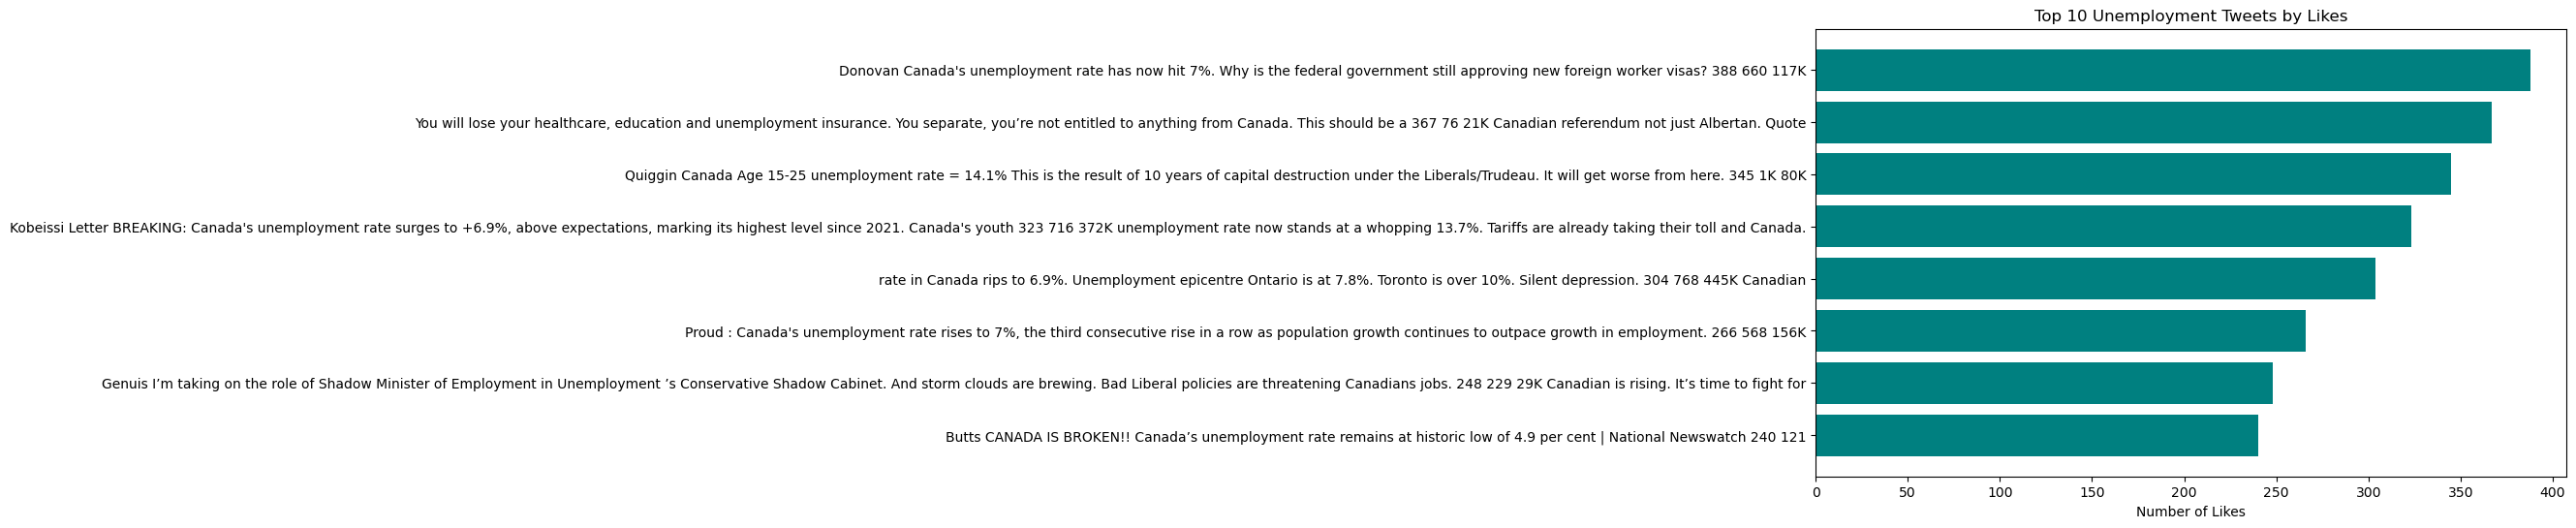

In [27]:
# Convert likes column to numeric
def convert_to_number(x):
    if isinstance(x, str):
        x = x.strip()
        if 'K' in x:
            return float(x.replace('K', '')) * 1000
        elif 'M' in x:
            return float(x.replace('M', '')) * 1000000
    return float(x) if pd.notnull(x) else 0


unemployment_tweets['likes'] = unemployment_tweets['likes'].apply(
    lambda x: convert_to_number(x) if isinstance(x, (int, float, str)) and str(x).replace('.', '').replace('K','').replace('M','').isdigit() else 0
)

# Top 10
top_unemp = unemployment_tweets.nlargest(10, 'likes')

plt.figure(figsize=(10, 6))
plt.barh(top_unemp['tweet_text'], top_unemp['likes'], color='teal')
plt.xlabel("Number of Likes")
plt.title("Top 10 Unemployment Tweets by Likes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [28]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.
